In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
#reading data from a file

data = pd.read_csv('FranksNumbers.txt', header=1, sep='\s+')
x_col =data['Data']
y_col = data['set']



    

<>:3: SyntaxWarning: invalid escape sequence '\s'
<>:3: SyntaxWarning: invalid escape sequence '\s'
/var/folders/t0/dsmc290j5355qf2rn298qwb40000gn/T/ipykernel_90445/2334927587.py:3: SyntaxWarning: invalid escape sequence '\s'
  data = pd.read_csv('FranksNumbers.txt', header=1, sep='\s+')


In [5]:
x_array = x_col.values
y_array = y_col.values



for i in range(len(x_array)):
    if x_array[i] == 'Data' and y_array[i] == 'set':
        x_array[i] = np.nan
        y_array[i] = np.nan
        
        


    
x_array = x_array.astype(float)
y_array = y_array.astype(float) 


nan_indices = np.where(np.isnan(x_array))[0]

# Split arrays at NaN positions
x_splits = np.split(x_array, nan_indices + 1)
y_splits = np.split(y_array, nan_indices + 1)

# Remove empty arrays and NaN values
x_splits = [x[~np.isnan(x)] for x in x_splits if len(x[~np.isnan(x)]) > 0]
y_splits = [y[~np.isnan(y)] for y in y_splits if len(y[~np.isnan(y)]) > 0]

# Access individual datasets
data_x_1, data_y_1 = x_splits[0], y_splits[0]
data_x_2, data_y_2 = x_splits[1], y_splits[1]
data_x_3, data_y_3 = x_splits[2], y_splits[2]
data_x_4, data_y_4 = x_splits[3], y_splits[3]
data_x_5, data_y_5 = x_splits[4], y_splits[4]

print(f"Dataset 1: {len(data_x_1)} points")
print(f"Dataset 2: {len(data_x_2)} points")
print(f"Dataset 3: {len(data_x_3)} points")
print(f"Dataset 4: {len(data_x_4)} points")
print(f"Dataset 5: {len(data_x_5)} points")



Dataset 1: 11 points
Dataset 2: 11 points
Dataset 3: 11 points
Dataset 4: 11 points
Dataset 5: 44 points


In [6]:
def func(x, a=0.48, b=3.02):
    y = x*a + b
    return y

def person_chi_2(x, y, y_error, a=0.48, b=3.02):
    y_model = func(x, a, b)
    chi_2 = np.sum((y - y_model)**2 / y_error**2)
    return chi_2

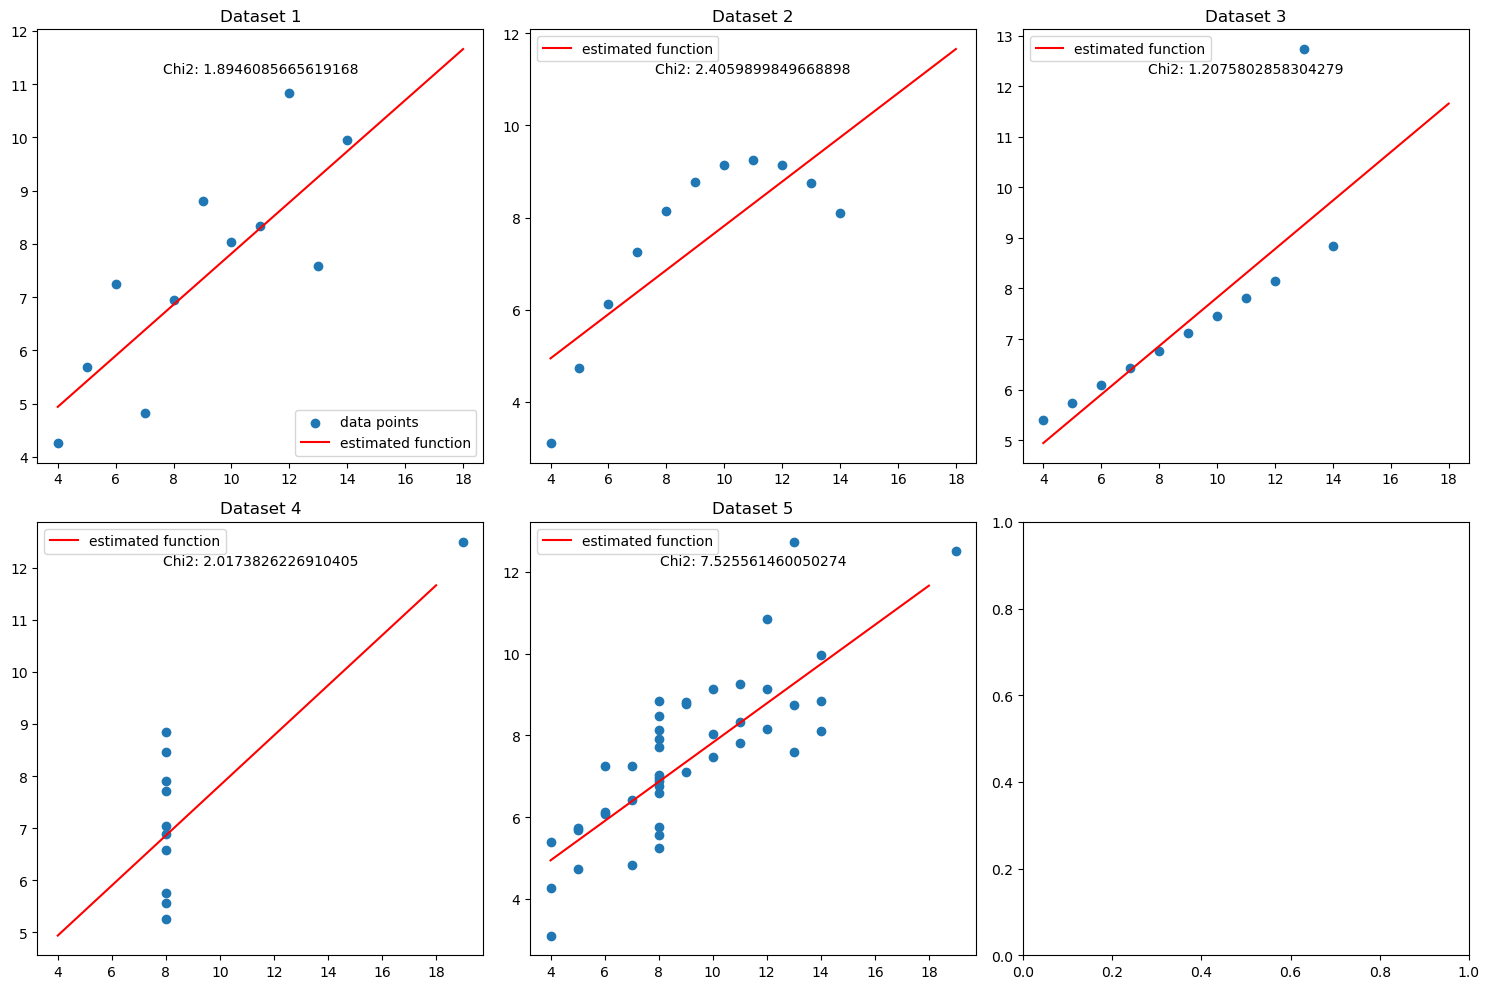

In [7]:
fig, ax = plt.subplots(2,3, figsize=(15,10))
x_axis = np.linspace(4, 18, 1000)

ax[0,0].scatter(data_x_1, data_y_1, label='data points')
ax[0,0].plot(x_axis, func(x_axis), color='red', label='estimated function')
ax[0,0].set_title('Dataset 1')
ax[0,0].text(0.5, 0.9, f"Chi2: {person_chi_2(data_x_1, data_y_1, y_error=np.sqrt(data_y_1))}", transform=ax[0,0].transAxes, ha='center')
ax[0,0].legend()

ax[0,1].scatter(data_x_2, data_y_2)
ax[0,1].plot(x_axis, func(x_axis), color='red', label='estimated function')
ax[0,1].set_title('Dataset 2')
ax[0,1].text(0.5, 0.9, f"Chi2: {person_chi_2(data_x_2, data_y_2, y_error=np.sqrt(data_y_2))}", transform=ax[0,1].transAxes, ha='center')
ax[0,1].legend()

ax[0,2].scatter(data_x_3, data_y_3)
ax[0,2].plot(x_axis, func(x_axis), color='red', label='estimated function')
ax[0,2].set_title('Dataset 3')
ax[0,2].text(0.5, 0.9, f"Chi2: {person_chi_2(data_x_3, data_y_3, y_error=np.sqrt(data_y_3))}", transform=ax[0,2].transAxes, ha='center')
ax[0,2].legend()

ax[1,0].scatter(data_x_4, data_y_4)
ax[1,0].plot(x_axis, func(x_axis), color='red', label='estimated function')
ax[1,0].set_title('Dataset 4')
ax[1,0].text(0.5, 0.9, f"Chi2: {person_chi_2(data_x_4, data_y_4, y_error=np.sqrt(data_y_4))}", transform=ax[1,0].transAxes, ha='center')
ax[1,0].legend()

ax[1,1].scatter(data_x_5, data_y_5)
ax[1,1].plot(x_axis, func(x_axis), color='red', label='estimated function')
ax[1,1].set_title('Dataset 5')
ax[1,1].text(0.5, 0.9, f"Chi2: {person_chi_2(data_x_5, data_y_5, y_error=np.sqrt(data_y_5))}", transform=ax[1,1].transAxes, ha='center')
ax[1,1].legend()
plt.tight_layout()
plt.show()

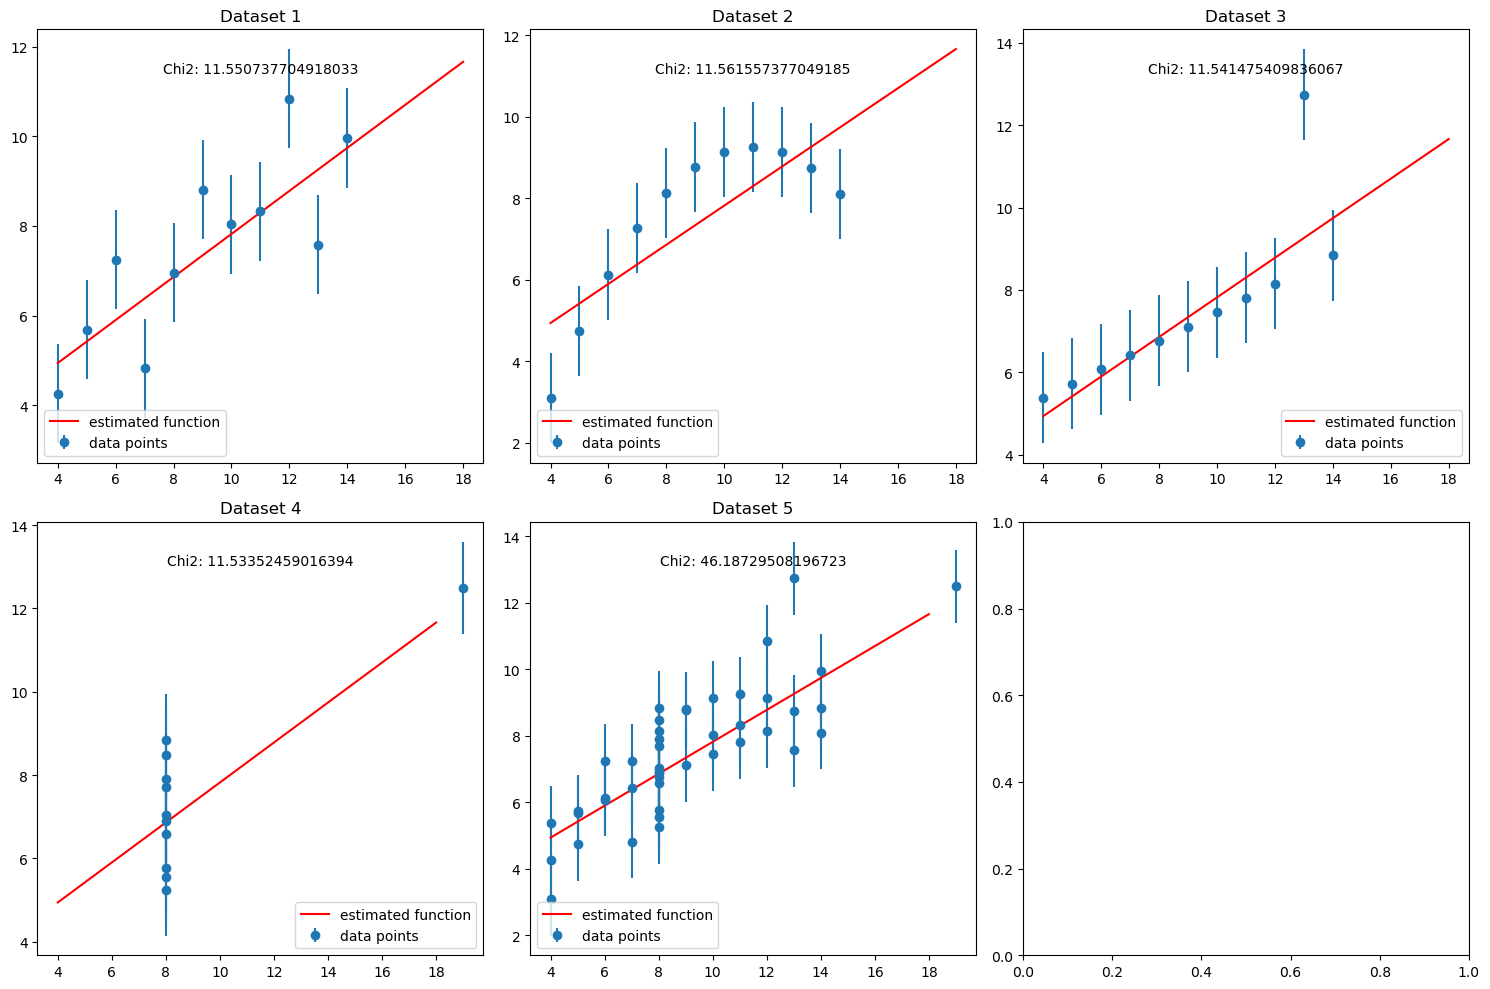

In [8]:
fig, ax = plt.subplots(2,3, figsize=(15,10))
x_axis = np.linspace(4, 18, 1000)
y_err = np.sqrt(1.22)
ax[0,0].errorbar(data_x_1, data_y_1, yerr=y_err, fmt='o', label='data points')
ax[0,0].plot(x_axis, func(x_axis), color='red', label='estimated function')
ax[0,0].set_title('Dataset 1')
ax[0,0].text(0.5, 0.9, f"Chi2: {person_chi_2(data_x_1, data_y_1, y_error=y_err)}", transform=ax[0,0].transAxes, ha='center')
ax[0,0].legend()

ax[0,1].errorbar(data_x_2, data_y_2, yerr=y_err, fmt='o', label='data points')
ax[0,1].plot(x_axis, func(x_axis), color='red', label='estimated function')
ax[0,1].set_title('Dataset 2')
ax[0,1].text(0.5, 0.9, f"Chi2: {person_chi_2(data_x_2, data_y_2, y_error=y_err)}", transform=ax[0,1].transAxes, ha='center')
ax[0,1].legend()

ax[0,2].errorbar(data_x_3, data_y_3, yerr=y_err, fmt='o', label='data points')
ax[0,2].plot(x_axis, func(x_axis), color='red', label='estimated function')
ax[0,2].set_title('Dataset 3')
ax[0,2].text(0.5, 0.9, f"Chi2: {person_chi_2(data_x_3, data_y_3, y_error=y_err)}", transform=ax[0,2].transAxes, ha='center')
ax[0,2].legend()

ax[1,0].errorbar(data_x_4, data_y_4, yerr=y_err, fmt='o', label='data points')
ax[1,0].plot(x_axis, func(x_axis), color='red', label='estimated function')
ax[1,0].set_title('Dataset 4')
ax[1,0].text(0.5, 0.9, f"Chi2: {person_chi_2(data_x_4, data_y_4, y_error=y_err)}", transform=ax[1,0].transAxes, ha='center')
ax[1,0].legend()

ax[1,1].errorbar(data_x_5, data_y_5, yerr=y_err, fmt='o', label='data points')
ax[1,1].plot(x_axis, func(x_axis), color='red', label='estimated function')
ax[1,1].set_title('Dataset 5')
ax[1,1].text(0.5, 0.9, f"Chi2: {person_chi_2(data_x_5, data_y_5, y_error=y_err)}", transform=ax[1,1].transAxes, ha='center')
ax[1,1].legend()
plt.tight_layout()
plt.show()